<a href="https://colab.research.google.com/github/jesupb/Data_Science_Toolbox/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
We'll work on binary classification with logistic regression. After that, we'll try out a generalization for multiclass logistic regression called _softmax_ regression.

In [1]:
import os
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/datasets/

Mounted at /content/drive
/content/drive/My Drive/datasets


In [5]:
# Load data
df_raw = pd.read_csv('heart.csv')

In [7]:
df_raw.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration
We'll check for some relationships by just plotting the data: How do our quantitative variables behave when split by our target variable? Are there any visual cues as to which variables might help separate between both classifications in our target variables?

In [9]:
quant_cols = ['age','trtbps','chol','thalachh','oldpeak']
cat_columns = ['sex','cp','fbs','rest_ecg','exng','slp','caa','thall']
print(df_raw[quant_cols].describe())

              age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


Text(0.5, 1.0, 'Scatter plot of chol vs trtbps, color coded by target variable')

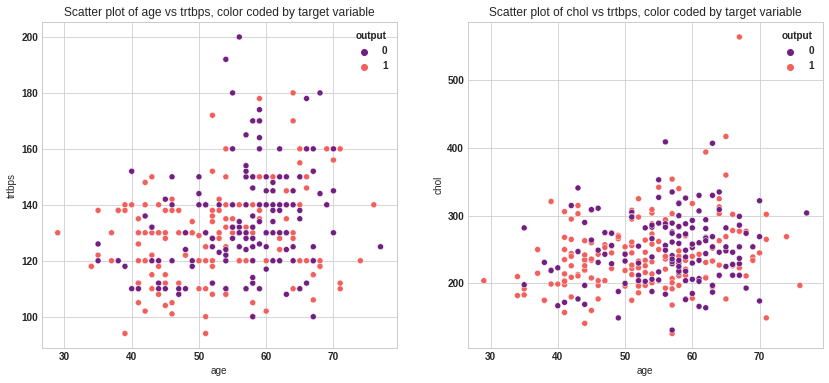

In [18]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='trtbps',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs trtbps, color coded by target variable')


ax = f.add_subplot(122)
sns.scatterplot(x='age',y='chol',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of chol vs trtbps, color coded by target variable')

Text(0.5, 1.0, 'Scatter plot of chol vs trtbps, color coded by target variable')

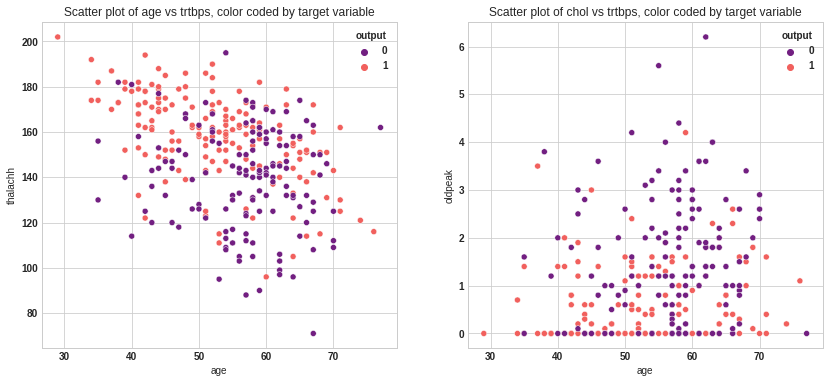

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='thalachh',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs thalachh, color coded by target variable')


ax = f.add_subplot(122)
sns.scatterplot(x='age',y='oldpeak',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of chol vs oldpeak, color coded by target variable')

Text(0.5, 1.0, 'Scatter plot of thalachh vs trtbps, color coded by target variable')

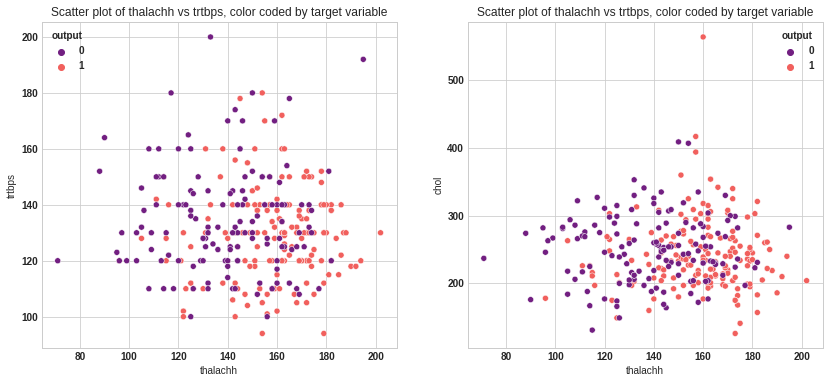

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='thalachh',y='trtbps',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of thalachh vs trtbps, color coded by target variable')


ax = f.add_subplot(122)
sns.scatterplot(x='thalachh',y='chol',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of thalachh vs trtbps, color coded by target variable')